# Basic Explanatory Data Analysis & Data Presentation (Movies Dataset)

In this project, I will have done some basic exploration and data manipulation:
- importing a data set and basic data inspection
- identifying best and worst movies based on some criteria
- filtering, sorting, and grouping data set
- writing simple data queries
- drawing conclusions based on the exploration methods mentioned above

## Data Import and first Inspection

1. __Importing__ the movies dataset from the CSV file "movies_complete.csv". Some basic __inspection__ of the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv("../dataset/movies_complete.csv", parse_dates= ["release_date"])

In [3]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,nan,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

We can see that there are quite many columns with missing values. But that is all right, for this small project, those missing values are not significant.

__Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

2. Some more data exploration.

In [5]:
# checking values including the missing ones for the budget column
df.budget_musd.value_counts(dropna = False).head()

nan      35837
5.00       286
10.00      258
20.00      243
2.00       241
Name: budget_musd, dtype: int64

In [6]:
# same for the revenue column
df.revenue_musd.value_counts(dropna = False).head()

nan      37306
12.00       20
11.00       19
10.00       19
2.00        18
Name: revenue_musd, dtype: int64

In [7]:
# let's also have a look at object type description 
df.describe(include = "object")

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [8]:
# we can see that the number of all titles is higher than 
# the number of its unique values. that means that 
# there are some movie duplicated titles

# the most frequent  title is "Cinderella"
df[df.title == "Cinderella"].head(10)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.90,263.59,RKO Radio Pictures|Walt Disney Productions,United States of America,1760.00,6.80,14.44,74.00,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,nan,nan,Walt Disney Television|Citadel Entertainment|S...,United States of America,28.00,6.10,2.10,88.00,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,nan,nan,NaN,United States of America,7.00,5.40,0.36,52.00,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,nan,nan,GoodTimes Entertainment,Japan|United States of America,2.00,6.00,2.15,48.00,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,nan,nan,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,Italy,9.00,5.30,0.99,180.00,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28340,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.00,543.51,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,United Kingdom|United States of America,2426.00,6.70,19.80,105.00,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//iH4C...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,nan,nan,Lenfilm,Russia,5.00,4.80,0.49,80.00,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,nan,nan,NaN,United States of America,5.00,5.90,0.21,77.00,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,nan,nan,NaN,NaN,5.00,5.60,1.09,90.00,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,nan,nan,Star-Film|Georges Méliès,France,19.00,5.50,1.30,5.00,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


## The Best and the Worst Movies

We are going to explore further our database. Here are some points on which we would like to concentrate:
- what are the best movies
- what are the worst movies
- what are the best and worst movies regarding a certain characteristic (revenue, return, etc)
- what movie features could distort our outcomes
- dealing these missing values
- displaying posters in the notebook view
- writing a function for evaluation best/worts movies

In [9]:
from IPython.display import HTML

In [10]:
# let's create a data frame with the most important columns
df_best = df[["poster_path", "title", "budget_musd", "revenue_musd",
              "vote_count", "vote_average", "popularity"]].copy()
df_best.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.00,373.55,5415.00,7.70,21.95
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.00,262.80,2413.00,6.90,17.02
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,nan,nan,92.00,6.50,11.71
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,nan,76.58,173.00,5.70,8.39


In [11]:
# adding 2 new columns based on revenue and budget
df_best["profit_musd"] = df.revenue_musd - df.budget_musd

# this column display how many dollars are returned on each dollar invested.
# the value of "1" means that a movie breaks even.
# the value > "1" means that the investors had a loss.
df_best["return_on_investment"] = df.revenue_musd / df.budget_musd

In [12]:
df_best.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return_on_investment
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,nan,nan,92.00,6.50,11.71,nan,nan
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,nan,76.58,173.00,5.70,8.39,nan,nan


In [13]:
# for data presentation purposes, let's make column labels more readable:
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes", 
                   "Average Rating", "Popularity", "Profit", "ROI"]

# and set the "Title" column as an index
df_best.set_index("Title", inplace = True)
df_best.head()

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,nan,nan,92.00,6.50,11.71,nan,nan
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,nan,76.58,173.00,5.70,8.39,nan,nan


Working with HTML format

In [14]:
# in the "" column, which contains poster paths, each value is in HTML format
df_best.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [15]:
# so what we want is to make those posters to be visable in the notebook  (at least for a small sample)

# we are taking a small data sample
subset = df_best.iloc[:5, :2]

# and putting it into HTML format
HTML(subset.to_html(escape=False))

,,Budget
Title,,
Toy Story,,30.00
Jumanji,,65.00
Grumpier Old Men,,nan
Waiting to Exhale,,16.00
Father of the Bride Part II,,nan


Some more exploration 

In [16]:
df_best.sort_values(by = "Average Rating", ascending = False).head(10)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,nan,nan,1.00,10.00,0.04,nan,nan
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2...,nan,nan,1.00,10.00,0.32,nan,nan
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifP...,nan,nan,1.00,10.00,0.04,nan,nan
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOc...,nan,nan,1.00,10.00,1.78,nan,nan
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH...,nan,nan,2.00,10.00,0.48,nan,nan
Avetik,<img src='http://image.tmdb.org/t/p/w185//cyc8...,nan,nan,3.00,10.00,0.15,nan,nan
Acéphale,<img src='http://image.tmdb.org/t/p/w185//b6ps...,nan,nan,1.00,10.00,0.05,nan,nan
Symphony of the Soil,<img src='http://image.tmdb.org/t/p/w185//2ECO...,nan,nan,1.00,10.00,0.05,nan,nan
Titus Andronicus,<img src='http://image.tmdb.org/t/p/w185//p74s...,nan,nan,1.00,10.00,0.23,nan,nan


In [17]:
# sorting as above is not good for the reason that at the top of the data set, 
# there are films with a very small amount of votes. 
# This is not much meaningful. Therefore, we need to add additional filter-s.

# The same problem applies to ROI sorting. Let's have a look:
df_best.sort_values(by = "ROI", ascending = False).head(10)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,0.00,12.40,77.00,6.10,4.03,12.40,12396383.00
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,0.00,8.50,881.00,8.10,8.16,8.50,8500000.00
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,0.00,33.58,49.00,7.70,4.22,33.58,4197476.62
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,0.00,2.76,3.00,6.00,0.23,2.76,2755584.00
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,0.00,115.10,457.00,5.90,9.23,115.10,1018619.28
Nurse 3-D,<img src='http://image.tmdb.org/t/p/w185//ny0N...,0.00,10.00,120.00,4.90,5.19,10.00,1000000.00
From Prada to Nada,<img src='http://image.tmdb.org/t/p/w185//jAJa...,0.00,2.50,87.00,5.00,11.10,2.50,26881.72
Paranormal Activity,<img src='http://image.tmdb.org/t/p/w185//1bjA...,0.01,193.36,1351.00,5.90,12.71,193.34,12890.39
Tarnation,<img src='http://image.tmdb.org/t/p/w185//7zeQ...,0.00,1.16,22.00,7.50,1.62,1.16,5330.34


In [18]:
# at the top, there are movies with 0 budget, 
# which can distort our later conclusions.

# Here we have ROI sorting once again, but with a budget filter:
df_best.loc[df_best.Budget >= 5].sort_values(by = "ROI", ascending = False).head(10)

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,5.00,368.74,686.00,6.20,6.72,363.74,73.75
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,7.00,470.65,2628.00,7.50,19.73,463.65,67.24
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,5.00,328.20,512.00,6.30,7.79,323.20,65.64
The Exorcist,<img src='http://image.tmdb.org/t/p/w185//4ucL...,8.00,441.31,2046.00,7.50,12.14,433.31,55.16
Get Out,<img src='http://image.tmdb.org/t/p/w185//qbaI...,5.00,252.43,2978.00,7.20,36.89,247.43,50.49
Four Weddings and a Funeral,<img src='http://image.tmdb.org/t/p/w185//qa72...,6.00,254.70,654.00,6.60,8.99,248.70,42.45
Paranormal Activity 3,<img src='http://image.tmdb.org/t/p/w185//zPXA...,5.00,205.70,685.00,5.90,11.00,200.70,41.14


In [19]:
# putting "0" instead of missing values:
df_best.Budget.fillna(0, inplace = True)
df_best.Votes.fillna(0, inplace = True)
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Budget          44691 non-null  float64
 2   Revenue         7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [20]:
# finnally, we are ready to write a function for identifying
# best and worst movies

def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0):
    
    
    df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes), 
                      ["", by]].sort_values(by = by, ascending = ascending).head(n).copy()
    
    return HTML(df2.to_html(escape=False))

Now we are looking into what movies are the best/worst based on some criteria:

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Movies Top 5 - Highest Revenue__

In [21]:
best_worst(n=5, by="Revenue")

,,Revenue
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


__Movies Top 5 - Highest Budget__

In [22]:
best_worst(5, "Budget")

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
Transformers: The Last Knight,,260.00


__Movies Top 5 - Highest Profit__

In [23]:
best_worst(5, "Profit")

,,Profit
Title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


__Movies Top 5 - Lowest Profit__

In [24]:
best_worst(5, "Profit", ascending = True)

,,Profit
Title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


__Movies Top 5 - Highest ROI__

In [25]:
best_worst(5, "ROI", min_bud = 50)

,,ROI
Title,,
Minions,,15.63
Jurassic Park,,14.60
The Twilight Saga: New Moon,,14.20
Deadpool,,13.50
Despicable Me 2,,12.77


__Movies Top 5 - Lowest ROI__

In [26]:
best_worst(5, "ROI", ascending = True, min_bud = 100)

,,ROI
Title,,
The Adventures of Pluto Nash,,0.07
The Alamo,,0.18
Live by Night,,0.21
Mars Needs Moms,,0.26
The Lone Ranger,,0.35


__Movies Top 5 - Most Votes__

In [27]:
best_worst(5, "Votes")

,,Votes
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


__Movies Top 5 - Highest Rating__

In [28]:
best_worst(5, "Average Rating", min_votes = 50)

,,Average Rating
Title,,
Planet Earth II,,9.50
Dilwale Dulhania Le Jayenge,,9.10
Planet Earth,,8.80
Sansho the Bailiff,,8.70
The Jinx: The Life and Deaths of Robert Durst,,8.60


__Movies Top 5 - Lowest Rating__

In [29]:
best_worst(5, "Average Rating", ascending = True, min_votes = 250)

,,Average Rating
Title,,
Dragonball Evolution,,2.90
Battlefield Earth,,3.00
Disaster Movie,,3.10
Epic Movie,,3.20
Son of the Mask,,3.60


In [30]:
best_worst(5, "Average Rating", ascending = True, min_votes = 20, min_bud = 20)

,,Average Rating
Title,,
Foodfight!,,2.30
Dragonball Evolution,,2.90
Battlefield Earth,,3.00
Disaster Movie,,3.10
Alone in the Dark,,3.10


__Movies Top 5 - Most Popular__

In [31]:
best_worst(20, "Popularity")

,,Popularity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85
Deadpool,,187.86
Guardians of the Galaxy Vol. 2,,185.33
Avatar,,185.07
John Wick,,183.87


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [32]:
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [33]:
mask_genres = df.genres.str.contains("Action") & df.genres.str.contains("Science Fiction")
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [34]:
mask_actor = df.cast.str.contains("Bruce Willis")
mask_actor

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [35]:
df.loc[mask_actor & mask_genres, ["title", "vote_average"]].sort_values(by = "vote_average", 
                                                                        ascending = False)

,title,vote_average
1448,The Fifth Element,7.30
19218,Looper,6.60
1786,Armageddon,6.50
14135,Surrogates,5.90
20333,G.I. Joe: Retaliation,5.40
27619,Vice,4.10


In [36]:
search1 = df.loc[mask_actor & mask_genres, ["title", "poster_path", "vote_average"]].sort_values(by = "vote_average", ascending = False).set_index("title")

In [37]:
HTML(search1.to_html(escape=False))

,poster_path,vote_average
title,,
The Fifth Element,,7.30
Looper,,6.60
Armageddon,,6.50
Surrogates,,5.90
G.I. Joe: Retaliation,,5.40
Vice,,4.10


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [38]:
mask_actress = df.cast.str.contains("Uma Thurman")
mask_director = df.director.str.contains("Quentin Tarantino")

In [39]:
search2 = df.loc[mask_actress & mask_director, ["title", "poster_path", "runtime"]].sort_values(by = "runtime", ascending = False).set_index("title")
search2

,poster_path,runtime
title,,
Pulp Fiction,<img src='http://image.tmdb.org/t/p/w185//d5iI...,154.00
Kill Bill: Vol. 2,<img src='http://image.tmdb.org/t/p/w185//2yhg...,136.00
Kill Bill: Vol. 1,<img src='http://image.tmdb.org/t/p/w185//v7Ta...,111.00


In [40]:
HTML(search2.to_html(escape=False))

,poster_path,runtime
title,,
Pulp Fiction,,154.00
Kill Bill: Vol. 2,,136.00
Kill Bill: Vol. 1,,111.00


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [41]:
mask_studio = df.production_companies.str.contains("Pixar")
mask_years = df.release_date.between("2010-01-01", "2015-12-31")

In [42]:
search3 = df.loc[mask_studio & mask_years, ["title", "poster_path", "release_date",
                                           "revenue_musd"]].sort_values(by = "revenue_musd", ascending = False).set_index("title")
search3

,poster_path,release_date,revenue_musd
title,,,
Toy Story 3,<img src='http://image.tmdb.org/t/p/w185//amY0...,2010-06-16,1066.97
Inside Out,<img src='http://image.tmdb.org/t/p/w185//lRHE...,2015-06-09,857.61
Monsters University,<img src='http://image.tmdb.org/t/p/w185//tyHH...,2013-06-20,743.56
Cars 2,<img src='http://image.tmdb.org/t/p/w185//okIz...,2011-06-11,559.85
Brave,<img src='http://image.tmdb.org/t/p/w185//8l0p...,2012-06-21,538.98
The Good Dinosaur,<img src='http://image.tmdb.org/t/p/w185//8RSk...,2015-11-14,331.93
Day & Night,<img src='http://image.tmdb.org/t/p/w185//eQ1Q...,2010-06-17,nan
The Blue Umbrella,<img src='http://image.tmdb.org/t/p/w185//iSWV...,2013-02-12,nan
Toy Story of Terror!,<img src='http://image.tmdb.org/t/p/w185//aNDr...,2013-10-15,nan


In [43]:
HTML(search3.to_html(escape=False))

,poster_path,release_date,revenue_musd
title,,,
Toy Story 3,,2010-06-16,1066.97
Inside Out,,2015-06-09,857.61
Monsters University,,2013-06-20,743.56
Cars 2,,2011-06-11,559.85
Brave,,2012-06-21,538.98
The Good Dinosaur,,2015-11-14,331.93
Day & Night,,2010-06-17,nan
The Blue Umbrella,,2013-02-12,nan
Toy Story of Terror!,,2013-10-15,nan


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [44]:
mask_triller = df.genres.str.contains("Thriller") |  df.genres.str.contains("Action")
mask_lang = df.original_language == "en"
mask_min_rating = df.vote_average >= 7.5 

In [45]:
mask_min_rating.head()

0     True
1    False
2    False
3    False
4    False
Name: vote_average, dtype: bool

In [46]:
search4 = df.loc[mask_triller & mask_lang & mask_min_rating, [
    "title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]].sort_values(by = "release_date", ascending = False).set_index("title")
search4.head()

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,<img src='http://image.tmdb.org/t/p/w185//8BNy...,TV Movie|Family|Action|Comedy|Music|Adventure,7.50,171.00,2017-07-21
Dunkirk,<img src='http://image.tmdb.org/t/p/w185//ebSn...,Action|Drama|History|Thriller|War,7.50,2712.00,2017-07-19
The Book of Henry,<img src='http://image.tmdb.org/t/p/w185//suLF...,Thriller|Drama|Crime,7.60,84.00,2017-06-16
Guardians of the Galaxy Vol. 2,<img src='http://image.tmdb.org/t/p/w185//y4MB...,Action|Adventure|Comedy|Science Fiction,7.60,4858.00,2017-04-19
Revengeance,<img src='http://image.tmdb.org/t/p/w185//p4St...,Comedy|Action|Animation,8.00,2.00,2017-04-05


In [47]:
HTML(search4.to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.50,171.00,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.50,2712.00,2017-07-19
The Book of Henry,,Thriller|Drama|Crime,7.60,84.00,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.60,4858.00,2017-04-19
Revengeance,,Comedy|Action|Animation,8.00,2.00,2017-04-05
First Round Down,,Action|Comedy,10.00,1.00,2017-03-04
Logan,,Action|Drama|Science Fiction,7.60,6310.00,2017-02-28
Tomato Red,NaN,Drama|Thriller,8.00,2.00,2017-02-24
Zero 3,,Thriller,8.70,3.00,2017-01-27


## What are the most common Words in Movie Titles and Taglines?

In [48]:
from wordcloud import WordCloud

In [49]:
df.tagline[1]

'Roll the dice and unleash the excitement!'

In [50]:
df.overview[1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [51]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [52]:
title_corpus = ' '.join(title)
overview_corpus = ' '.join(overview)
tagline_corpus = ' '.join(tagline)

In [53]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(title_corpus)
title_wordcloud

In [54]:
# plots below are made for fub :)

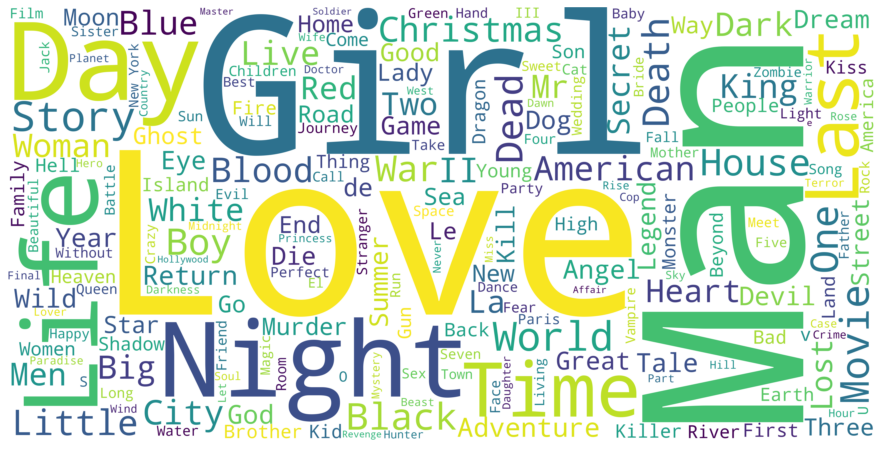

In [55]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

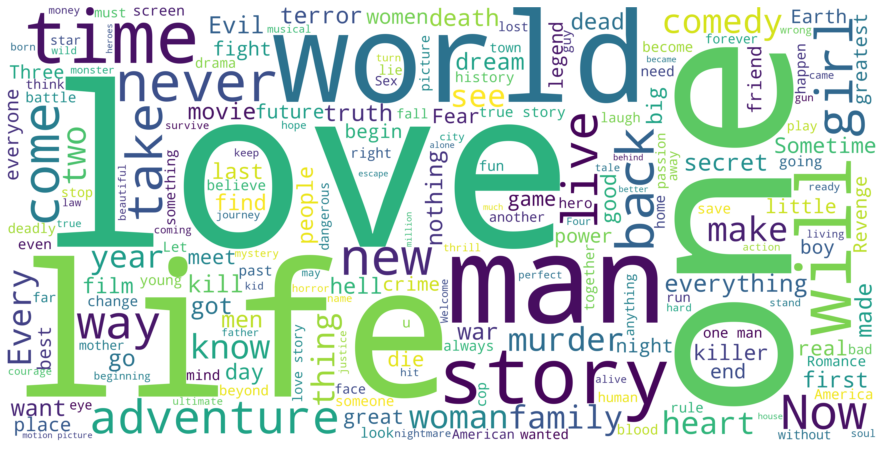

In [56]:
tagline_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

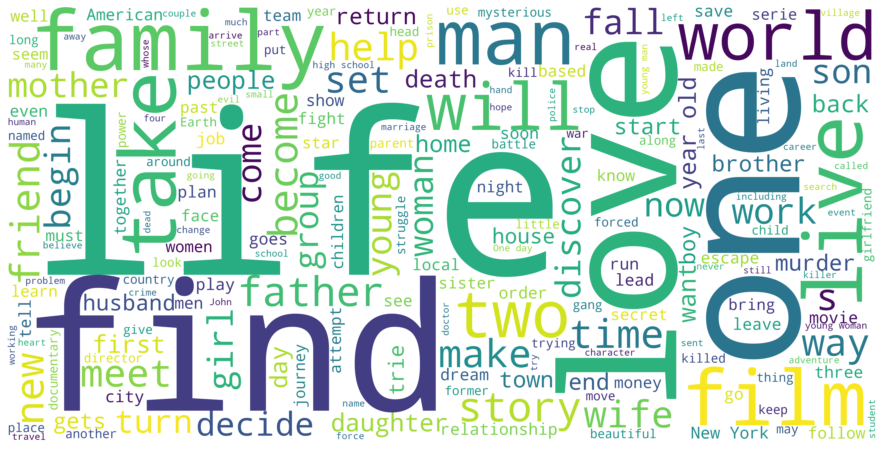

In [57]:
overview_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

In [58]:
# first, let's look at the "belongs_to_collection" column
df.belongs_to_collection.head()

0              Toy Story Collection
1                               NaN
2         Grumpy Old Men Collection
3                               NaN
4    Father of the Bride Collection
Name: belongs_to_collection, dtype: object

In [59]:
# we can see from the above that there are quite many NaN cells in the column
# let's check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [60]:
# approximately every 10th movie from the list belongs to a franchise.
# the best way to continue is to create a new column for franchises
# with True/False values
df["Franchise"] = df.belongs_to_collection.notna()

In [61]:
df.Franchise.head()

0     True
1    False
2     True
3    False
4     True
Name: Franchise, dtype: bool

__Franchise vs. Stand-alone: Average Revenue__

In [62]:
df.groupby("Franchise").revenue_musd.mean()

Franchise
False    44.74
True    165.71
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [63]:
df["ROI"] = df.revenue_musd.div(df.budget_musd)

In [64]:
df.groupby("Franchise").ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [65]:
df.groupby("Franchise").budget_musd.mean()

Franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [66]:
df.groupby("Franchise").popularity.mean()

Franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [67]:
df.groupby("Franchise").vote_average.mean()

Franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

In [68]:
#finally, let's put all together into a table
df.groupby("Franchise").agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median", "vote_count":"mean"})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,18.05,44.74,6.01,2.59,1.62,78.29
True,38.32,165.71,5.96,6.25,3.71,412.39


We can see that, except for rating, on average franchises are more successful than stand-alone movies. Perhaps that is the reason, why the companies release so many franchise pieces each year.

## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [69]:
df.belongs_to_collection.unique()

array(['Toy Story Collection', nan, 'Grumpy Old Men Collection', ...,
       'Ducobu Collection', 'Mister Blot Collection',
       'Red Lotus Collection'], dtype=object)

In [70]:
# total number of movies
df.belongs_to_collection.value_counts().head()

The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
Name: belongs_to_collection, dtype: int64

In [71]:
# to make querries easier, let's create a data set with data we require.
franchises = df.groupby("belongs_to_collection").agg({"title":"count",
                                        "budget_musd": ["sum", "mean"],
                                        "revenue_musd": ["sum", "mean"],
                                        "vote_average": "mean",
                                        "vote_count":"mean"})

#I have put in the data set the "vote_count":"mean" column as we need to
# find the most successful franchises according mean rating, and 
# we would like to have the most famous movies to be analyses.

In [72]:
# according to the total number of movies
franchises.nlargest(10, ("title", "count"))

title budget_musd       revenue_musd  \
                                       count         sum  mean          sum   
belongs_to_collection                                                         
The Bowery Boys                           29        0.00   nan         0.00   
Totò Collection                           27        0.00   nan         0.00   
James Bond Collection                     26     1539.65 59.22      7106.97   
Zatôichi: The Blind Swordsman             26        0.00   nan         0.00   
The Carry On Collection                   25        0.00   nan         0.00   
Charlie Chan (Sidney Toler) Collection    21        0.00   nan         0.00   
Pokémon Collection                        20      250.72 50.14       601.87   
Godzilla (Showa) Collection               16        2.81  0.56         0.00   
Charlie Chan (Warner Oland) Collection    15        0.00   nan         0.00   
Dragon Ball Z (Movie) Collection          15        5.00  5.00       112.12   

                                              vote_average vote_count  
                                         mean         mean       mean  
belongs_to_collection                                                  
The Bowery Boys                           nan         6.67       0.72  
Totò Collection                           nan         6.84      18.04  
James Bond Collection                  273.35         6.34    1284.31  
Zatôichi: The Blind Swordsman             nan         6.40      11.19  
The Carry On Collection                   nan         6.17      21.04  
Charlie Chan (Sidney Toler) Collection    nan         6.61       5.81  
Pokémon Collection                      66.87         6.06      71.10  
Godzilla (Showa) Collection               nan         5.98      39.75  
Charlie Chan (Warner Oland) Collection    nan         6.66       6.87  
Dragon Ball Z (Movie) Collection        56.06         6.61     133.33

In [73]:
# according to total & mean revenue
franchises.nlargest(10, ("revenue_musd", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Avatar Collection                       1      237.00 237.00      2787.97   
The Avengers Collection                 2      500.00 250.00      2924.96   
Frozen Collection                       2      150.00 150.00      1274.22   
Finding Nemo Collection                 2      294.00 147.00      1968.91   
The Hobbit Collection                   3      750.00 250.00      2935.52   
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Star Wars Collection                    8      854.35 106.79      7434.49   
Despicable Me Collection                6      299.00  74.75      3691.07   
Pirates of the Caribbean Collection     5     1250.00 250.00      4521.58   

                                            vote_average vote_count  
                                       mean         mean       mean  
belongs_to_collection                                                
Avatar Collection                   2787.97         7.20   12114.00  
The Avengers Collection             1462.48         7.35    9454.00  
Frozen Collection                   1274.22         7.10    3035.00  
Finding Nemo Collection              984.45         7.20    5312.50  
The Hobbit Collection                978.51         7.23    5981.33  
The Lord of the Rings Collection     972.18         8.03    8253.00  
Harry Potter Collection              963.42         7.54    5983.25  
Star Wars Collection                 929.31         7.37    5430.38  
Despicable Me Collection             922.77         6.78    3041.33  
Pirates of the Caribbean Collection  904.32         6.88    5016.00

In [74]:
# according to total & mean budget
franchises.nlargest(10, ("budget_musd", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Tangled Collection                      2      260.00 260.00       591.79   
Pirates of the Caribbean Collection     5     1250.00 250.00      4521.58   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Hobbit Collection                   3      750.00 250.00      2935.52   
Man of Steel Collection                 2      475.00 237.50      1536.11   
Avatar Collection                       1      237.00 237.00      2787.97   
The Amazing Spider-Man Collection       2      415.00 207.50      1457.93   
World War Z Collection                  1      200.00 200.00       531.87   
Spider-Man Collection                   3      597.00 199.00      2496.35   
The Dark Knight Collection              3      585.00 195.00      2463.72   

                                            vote_average vote_count  
                                       mean         mean       mean  
belongs_to_collection                                                
Tangled Collection                   591.79         7.25    1901.00  
Pirates of the Caribbean Collection  904.32         6.88    5016.00  
The Avengers Collection             1462.48         7.35    9454.00  
The Hobbit Collection                978.51         7.23    5981.33  
Man of Steel Collection              768.05         6.10    6825.50  
Avatar Collection                   2787.97         7.20   12114.00  
The Amazing Spider-Man Collection    728.97         6.50    5504.00  
World War Z Collection               531.87         6.70    5683.00  
Spider-Man Collection                832.12         6.47    4505.67  
The Dark Knight Collection           821.24         7.80    9681.00

In [75]:
# according to mean rating with at least 1000 vote count
franchises[franchises[("vote_count", "mean")] >=1000].nlargest(10, ("vote_average", "mean"))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
The Godfather Collection                3       73.00  24.33       429.38   
Blade Runner Collection                 1       28.00  28.00        33.14   
The Man With No Name Collection         3        2.00   0.67        35.50   
The Dark Knight Collection              3      585.00 195.00      2463.72   
Guardians of the Galaxy Collection      2      370.00 185.00      1636.74   
Kill Bill Collection                    2       60.00  30.00       333.11   
Kingsman Collection                     1       81.00  81.00       414.35   
How to Train Your Dragon Collection     2      310.00 155.00      1104.00   
Harry Potter Collection                 8     1280.00 160.00      7707.37   

                                           vote_average vote_count  
                                      mean         mean       mean  
belongs_to_collection                                               
The Lord of the Rings Collection    972.18         8.03    8253.00  
The Godfather Collection            143.13         7.97    3677.00  
Blade Runner Collection              33.14         7.90    3833.00  
The Man With No Name Collection      11.83         7.83    1422.67  
The Dark Knight Collection          821.24         7.80    9681.00  
Guardians of the Galaxy Collection  818.37         7.75    7436.00  
Kill Bill Collection                166.55         7.70    4576.00  
Kingsman Collection                 414.35         7.60    6069.00  
How to Train Your Dragon Collection 552.00         7.55    3741.00  
Harry Potter Collection             963.42         7.54    5983.25

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [76]:
df.director.head()

0      John Lasseter
1       Joe Johnston
2      Howard Deutch
3    Forest Whitaker
4      Charles Shyer
Name: director, dtype: object

In [77]:
# let's do the same as we have done with the franchise
# aggrigating a new data set
directors = df.groupby("director").agg({"title":"count",
                                        "revenue_musd": ["sum", "mean"],
                                        "budget_musd": ["sum", "mean"],
                                        "vote_average": "mean",
                                        "vote_count":"mean"})

In [78]:
# according to the total number of movies
directors.nlargest(10, ("title", "count"))

title revenue_musd       budget_musd       vote_average  \
                 count          sum  mean         sum  mean         mean   
director                                                                   
John Ford           66        85.17  8.52       35.62  2.74         6.38   
Michael Curtiz      65        37.82  7.56       10.80  1.54         6.00   
Werner Herzog       54        24.57  6.14       58.38  4.86         6.81   
Alfred Hitchcock    53       250.11 11.91       48.67  2.03         6.64   
Georges Méliès      49         0.00   nan        0.01  0.01         5.93   
Woody Allen         49       993.97 36.81      396.20 13.21         6.69   
Jean-Luc Godard     46         0.87  0.14        2.61  0.26         6.80   
Sidney Lumet        46       294.52 22.66      113.45 10.31         6.58   
Charlie Chaplin     44        26.52  4.42       19.17  2.40         6.54   
Raoul Walsh         43         1.21  1.21        2.01  0.67         6.00   

                 vote_count  
                       mean  
director                     
John Ford             33.48  
Michael Curtiz        38.09  
Werner Herzog         46.59  
Alfred Hitchcock     240.98  
Georges Méliès        16.86  
Woody Allen          316.57  
Jean-Luc Godard       32.13  
Sidney Lumet         114.93  
Charlie Chaplin       85.18  
Raoul Walsh           13.56

In [79]:
# according to revenue
directors.nlargest(10, ("revenue_musd", "mean"))

title revenue_musd         budget_musd        vote_average  \
                 count          sum    mean         sum   mean         mean   
director                                                                      
Chris Buck           2      1274.22 1274.22      150.00 150.00         7.10   
Lee Unkrich          1      1066.97 1066.97      200.00 200.00         7.60   
David Yates          9      5334.56  889.09     1135.00 189.17         6.70   
Chris Renaud         2       875.46  875.46       75.00  75.00         6.55   
Kyle Balda           5      2525.63  841.88      224.00  74.67         6.62   
Byron Howard         3      1615.58  807.79      410.00 205.00         7.40   
Chris Miller         1       798.96  798.96      160.00 160.00         6.00   
Roger Allers         3       788.24  788.24       45.00  45.00         7.50   
Tim Miller           1       783.11  783.11       58.00  58.00         7.40   
Robert Stromberg     1       758.54  758.54      180.00 180.00         7.00   

                 vote_count  
                       mean  
director                     
Chris Buck          3035.00  
Lee Unkrich         4710.00  
David Yates         3450.67  
Chris Renaud        1790.50  
Kyle Balda          1602.60  
Byron Howard        2921.00  
Chris Miller        2355.00  
Roger Allers        1859.67  
Tim Miller         11444.00  
Robert Stromberg    4607.00

In [80]:
# however, we can see there are directors with just 1 movie which is not quite representative.
# let's add some arbitrary  filters
directors[(directors[("vote_count", "mean")] >=500) 
          & (directors[("budget_musd", "mean")] >=10)
          & (directors[("title", "count")] >=5)].nlargest(10, ("revenue_musd", "mean"))

title revenue_musd        budget_musd        vote_average  \
                 count          sum   mean         sum   mean         mean   
director                                                                     
David Yates          9      5334.56 889.09     1135.00 189.17         6.70   
Kyle Balda           5      2525.63 841.88      224.00  74.67         6.62   
Joss Whedon          5      2963.83 740.96      539.20 134.80         7.40   
James Cameron       11      5900.61 737.58      760.05  84.45         6.93   
J.J. Abrams          5      3579.22 715.84      785.00 157.00         7.08   
Carlos Saldanha      5      2532.45 633.11      363.00  90.75         6.50   
Peter Jackson       13      6528.24 593.48     1326.78 102.06         7.14   
George Lucas         7      3341.55 556.93      360.55  60.09         6.81   
Francis Lawrence     6      3183.34 530.56      703.00 117.17         6.80   
Andrew Adamson       6      2606.86 521.37      615.00 153.75         6.52   

                 vote_count  
                       mean  
director                     
David Yates         3450.67  
Kyle Balda          1602.60  
Joss Whedon         4109.60  
James Cameron       3066.91  
J.J. Abrams         4320.80  
Carlos Saldanha     1723.00  
Peter Jackson       3659.31  
George Lucas        2884.29  
Francis Lawrence    4038.83  
Andrew Adamson      1953.50

In [81]:
# according to vote rating
directors[(directors[("vote_count", "mean")] >=50)
          & (directors[("budget_musd", "mean")] >=10)
          & (directors[("title", "count")] >=5)].nlargest(10, ("vote_average", "mean"))

title revenue_musd        budget_musd         \
                     count          sum   mean         sum   mean   
director                                                            
Yann Arthus-Bertrand     5         0.00    nan       13.00  13.00   
Hayao Miyazaki          14       995.90 142.27      145.08  20.73   
Christopher Nolan       11      4747.41 474.74     1105.01 110.50   
Quentin Tarantino       10      1526.67 169.63      320.20  35.58   
Joss Whedon              5      2963.83 740.96      539.20 134.80   
Wes Anderson            10       437.62  54.70      189.00  23.62   
David Fincher           10      2139.35 213.93      650.00  65.00   
Ava DuVernay             5        66.79  66.79       20.00  20.00   
Spike Jonze             13       203.10  50.78      155.00  38.75   
Alastair Fothergill      7       124.24  62.12       15.00  15.00   

                     vote_average vote_count  
                             mean       mean  
director                                      
Yann Arthus-Bertrand         7.80      62.60  
Hayao Miyazaki               7.70    1050.00  
Christopher Nolan            7.62    6122.18  
Quentin Tarantino            7.49    4591.00  
Joss Whedon                  7.40    4109.60  
Wes Anderson                 7.37    1174.30  
David Fincher                7.35    3758.80  
Ava DuVernay                 7.28     196.20  
Spike Jonze                  7.27     512.69  
Alastair Fothergill          7.26      82.00